# Relaxation Method
### 1. Set Variables

In [162]:
arraySize = 50

#Select how each edge potential is to be defined
valueType = ("CONSTANT","COSINE", "SINE")
topValueType = valueType[1]
rightValueType = valueType[1]
bottomValueType = valueType[1]
leftValueType = valueType[1]

#Select the constant value for each edge, or the scalar to be applied to the function
topValue = 2
rightValue = -4
bottomValue = 2
leftValue = 4

#Now set the frequency for the top and bottom sin potentials
topFrequency = .5
rightFrequency = 3
bottomFrequency = .5
leftFrequency = 3

#Set the Offset from zero for the function defining the edge potential
topOffset = 0
rightOffset = 0
bottomOffset = 0
leftOffset = 0

#Simulate until average change is less than this:
deltaThreshold = 0.001

### 2. Setup Array
##### a. Define useful reusable functions

In [163]:
def GetValueToSet(curEdgeToSet, curIndex, curArraySize):
    if curEdgeToSet == "TOP":
        if topValueType == "CONSTANT":
            return topValue
        else:
            angle = (curIndex/curArraySize)*2*np.pi*topFrequency
            if topValueType == "SINE":
                return topValue * np.sin(angle)
            if topValueType == "COSINE":
                return topValue * np.cos(angle)
    elif curEdgeToSet == "RIGHT":
        if rightValueType == "CONSTANT":
            return rightValue
        else:
            angle = (curIndex/curArraySize)*2*np.pi*rightFrequency
            if rightValueType == "SINE":
                return rightValue * np.sin(angle)
            if rightValueType == "COSINE":
                return rightValue * np.cos(angle)
    elif curEdgeToSet == "BOTTOM":
        if bottomValueType == "CONSTANT":
            return bottomValue
        else:
            angle = (curIndex/curArraySize)*2*np.pi*bottomFrequency
            if bottomValueType == "SINE":
                return bottomValue * np.sin(angle)
            if bottomValueType == "COSINE":
                return bottomValue * np.cos(angle)
    elif curEdgeToSet == "LEFT":
        if leftValueType == "CONSTANT":
            return leftValue
        else:
            angle = (curIndex/curArraySize)*2*np.pi*leftFrequency
            if leftValueType == "SINE":
                return leftValue * np.sin(angle)
            if leftValueType == "COSINE":
                return leftValue * np.cos(angle)

def SetEdge(edgeToSet):
    index = 1
    if edgeToSet == "TOP":
        while index < arraySize+1:
            space[0,index] = GetValueToSet(edgeToSet, index-1, arraySize-1)
            index += 1
    elif edgeToSet == "RIGHT":
        while index < arraySize+1:
            space[index, arraySize+1] = GetValueToSet(edgeToSet, index-1, arraySize-1)
            index += 1
    elif edgeToSet == "BOTTOM":
        while index < arraySize+1:
            space[arraySize+1, index] = GetValueToSet(edgeToSet, index-1, arraySize-1)
            index += 1
    elif edgeToSet == "LEFT":
        while index < arraySize+1:
            space[index, 0] = GetValueToSet(edgeToSet, index-1, arraySize-1)
            index += 1
    return
        

##### b. Setup the matrix with the boundary conditions

In [164]:
import numpy as np
space = np.zeros((arraySize+2,arraySize+2), float)
SetEdge("TOP")
SetEdge("RIGHT")
SetEdge("BOTTOM")
SetEdge("LEFT")
print(space)

[[ 0.          2.          1.99589079 ... -1.99589079 -2.
   0.        ]
 [ 4.          0.          0.         ...  0.          0.
  -4.        ]
 [ 3.70766703  0.          0.         ...  0.          0.
  -3.70766703]
 ...
 [ 3.70766703  0.          0.         ...  0.          0.
  -3.70766703]
 [ 4.          0.          0.         ...  0.          0.
  -4.        ]
 [ 0.          2.          1.99589079 ... -1.99589079 -2.
   0.        ]]


##### c. Plot initial Setup

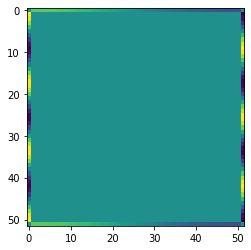

In [165]:
import matplotlib.pyplot as plt
x = range(arraySize)
y = range(arraySize)
initialData = space
fig1 = plt.figure()
plt.imshow(initialData)
plt.show()

### 3. Perform the Average

In [166]:
count = 0
changeTotal = 1
while changeTotal > deltaThreshold: 
    print("loop")
    changeTotal = 0
    count = 0
    i = 1
    while i < arraySize+1:
        j = 1
        while j < arraySize+1:
            total = 0
            total += space[i-1,j]
            total += space[i+1,j]
            total += space[i,j-1]
            total += space[i,j+1]
            total /= 4
            if(space[i,j] != 0 or space[i,j] != 0.0):
                changeTotal += abs((total-space[i,j])/space[i,j])
                count += 1
            space[i,j] = total
            j += 1
        i += 1
    if count > 0:
        changeTotal /= count
        print(changeTotal)
    else:
        changeTotal = 1
print(space)

loop
loop
1.5123942973567391e+22
loop
3.3968239838195134e+19
loop
2.192474034213832e+17
loop
33442776683728.36
loop
4145212642387.366
loop
86262468921.40393
loop
1519390019.2750268
loop
17977173.08776921
loop
2175113.3705928475
loop
178333.7045075957
loop
27304.88894536981
loop
623.3665958133038
loop
31.950445283741725
loop
1.8409538417415205
loop
0.468541443588952
loop
0.7284375793144681
loop
0.35977741250418477
loop
0.2887362127023827
loop
0.39235296662470037
loop
0.21442165832616303
loop
0.2352290292145932
loop
0.24644372246570462
loop
0.16468643005504713
loop
0.35878223793930863
loop
0.12269901289641601
loop
0.2841297078203962
loop
0.27899907997528
loop
0.15520785010581603
loop
0.09574192102924826
loop
0.1253792152301323
loop
0.22496618438453944
loop
0.11730606023000582
loop
0.09132622810932549
loop
0.13975987079946864
loop
0.08327887735894968
loop
0.0820182177895851
loop
0.09770516831512084
loop
0.06480199647923607
loop
0.23648353078301193
loop
0.062216246053085435
loop
0.05789513

### 4. Plot It

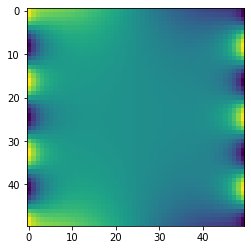

In [167]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
x = range(arraySize)
y = range(arraySize)
data = space[1:arraySize+1,1:arraySize+1]
fig2 = plt.figure()
sFig  = fig2.add_subplot(111)## projection='3d')
plt.imshow(data)

#X,Y = np.meshgrid(x,y)
#sFig.plot_surface(X, Y, data)
plt.show()